In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.stats.multicomp 
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sa
import statsmodels.formula.api as smf
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [16]:
df=pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/plants_leaves.csv")
df=pd.melt(df.reset_index(),id_vars=["Id"],value_vars=["W1","W2","W3","W4","W5"])
df.columns=["ID","time","rta"]
df.head(5)

,ID,time,rta
0,P1,W1,4
1,P2,W1,3
2,P3,W1,6
3,P4,W1,5
4,P5,W1,5


<Axes: xlabel='time', ylabel='rta'>

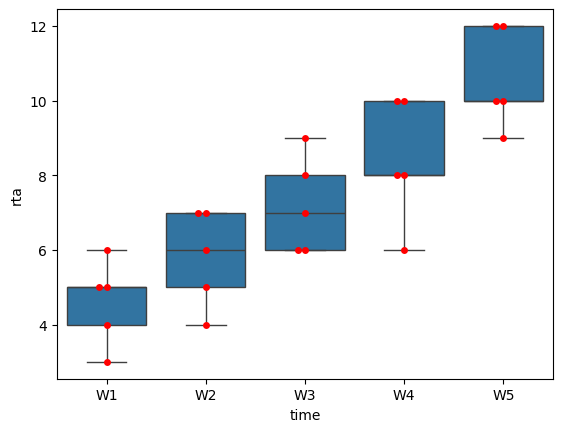

In [14]:
sns.boxplot(x="time",y="rta",data=df)
sns.swarmplot(x="time",y="rta",data=df,color="red")

In [18]:
mod=pg.rm_anova(dv='rta', within='time', subject='ID', data=df, detailed=True)
mod

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,time,108.24,4,27.060,146.27027,2.214820e-12,0.744224,0.541964
1,Error,2.96,16,0.185,NaN,NaN,NaN,NaN


In [22]:
pg.sphericity(data=df, dv='rta', subject='ID', within='time')

SpherResults(spher=True, W=0.1333930222643612, chi2=4.868267346520268, dof=9, pval=0.8883022484983495)

In [25]:
post_hocs = pg.pairwise_tests(data=df, dv='rta', subject='ID', within='time', padjust='fdr_bh')
post_hocs.round(4)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,time,W1,W2,True,True,-6.0000,4.0,two-sided,0.0039,0.0049,fdr_bh,13.991,-0.8850
1,time,W1,W3,True,True,-10.6145,4.0,two-sided,0.0004,0.0007,fdr_bh,68.116,-1.9175
2,time,W1,W4,True,True,-10.1559,4.0,two-sided,0.0005,0.0008,fdr_bh,60.047,-2.3972
3,time,W1,W5,True,True,-18.9737,4.0,two-sided,0.0000,0.0002,fdr_bh,369.333,-4.3529
4,time,W2,W3,True,True,-5.7155,4.0,two-sided,0.0046,0.0052,fdr_bh,12.3,-0.9698
5,time,W2,W4,True,True,-10.6145,4.0,two-sided,0.0004,0.0007,fdr_bh,68.116,-1.5656
6,time,W2,W5,True,True,-24.0000,4.0,two-sided,0.0000,0.0002,fdr_bh,740.006,-3.2773
7,time,W3,W4,True,True,-3.2071,4.0,two-sided,0.0327,0.0327,fdr_bh,3.006,-0.7226
8,time,W3,W5,True,True,-13.8804,4.0,two-sided,0.0002,0.0005,fdr_bh,147.775,-2.3214
9,time,W4,W5,True,True,-11.0000,4.0,two-sided,0.0004,0.0007,fdr_bh,75.445,-1.3103
